# Compare cube shifting methods

In [1]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
import sys
import os

folder = '../../../../crispy'
print(folder)
if folder not in sys.path: sys.path.append(folder)

from crispy.params import Params
folder = '../../../crispy'

from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.IFS import polychromeIFS
from crispy.IFS import reduceIFSMap
from crispy.tools.imgtools import scale2imgs,bowtie
from crispy.tools.image import Image
from crispy.tools.rotate import rotateCube,shiftCube
from astropy.io import fits
import scipy

par = Params(folder)


Populating the interactive namespace from numpy and matplotlib
../../../../crispy


crispy - INFO - Read data from HDU 1 of ../../../crispy/SimResults/ref_average_detector_test_x0_red_optext.fits
crispy - INFO - Read inverse variance from HDU 2 of ../../../crispy/SimResults/ref_average_detector_test_x0_red_optext.fits


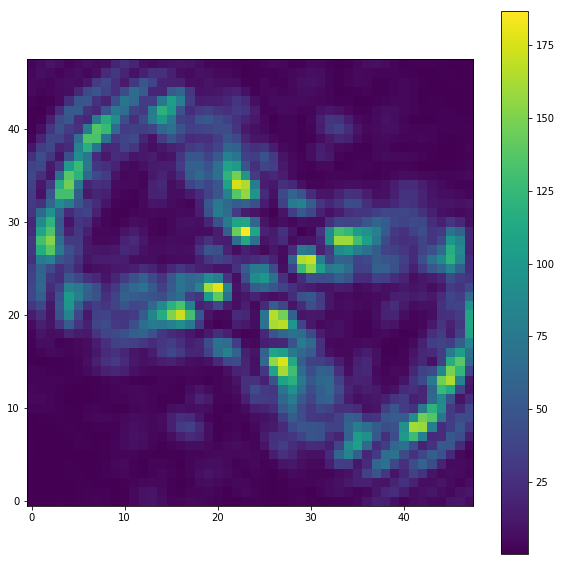

In [2]:
# cube = Image(par.exportDir+'/lstsq_residual_x0.5_y0.5.fits')
cube = Image(par.exportDir+'/ref_average_detector_test_x0_red_optext.fits')
cube.data[np.isnan(cube.data)]=0.0
slicenum = 10
trim=30
xshift = 0.5
yshift = 0.5
plt.figure(figsize=(10,10))
plt.imshow(cube.data[slicenum,trim:-trim,trim:-trim])
plt.colorbar()

#### First method: order 1 map_coordinates

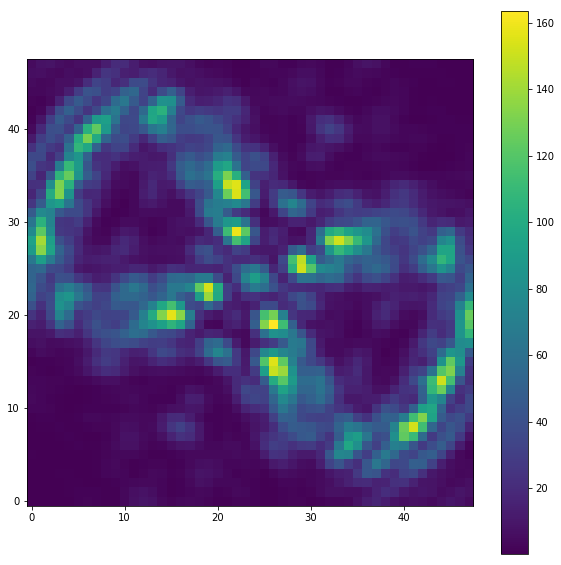

In [3]:
c = np.cos(par.philens)
s = np.sin(par.philens)
cube1 = shiftCube(cube.data,
                  dx=-xshift*c-yshift*s,
                  dy=-yshift*c+xshift*s,order=1)
plt.figure(figsize=(10,10))
plt.imshow(cube1[slicenum,trim:-trim,trim:-trim])
plt.colorbar()
outkey = fits.HDUList(fits.PrimaryHDU(cube1.astype(np.float)))
outkey.writeto(par.exportDir+'/cube1_shift.fits',clobber=True)


#### Method 2: spline

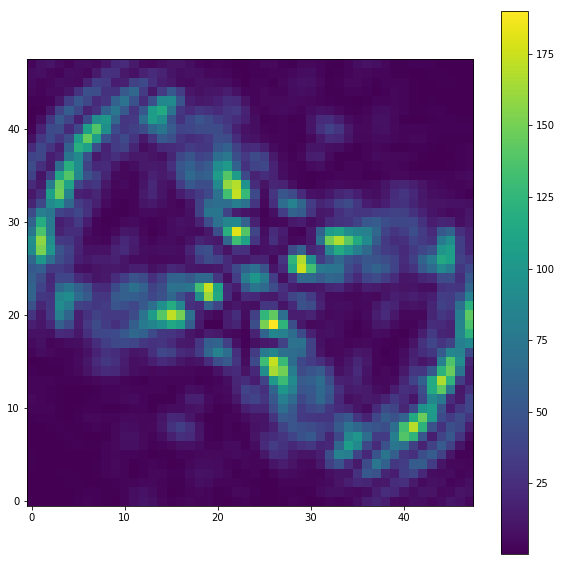

In [4]:
c = np.cos(par.philens)
s = np.sin(par.philens)
cube2 = shiftCube(cube.data,
                  dx=-xshift*c-yshift*s,
                  dy=-yshift*c+xshift*s,order=3)
plt.figure(figsize=(10,10))
plt.imshow(cube2[slicenum,trim:-trim,trim:-trim])
plt.colorbar()
outkey = fits.HDUList(fits.PrimaryHDU(cube2.astype(np.float)))
outkey.writeto(par.exportDir+'/cube2_shift.fits',clobber=True)


#### Show difference

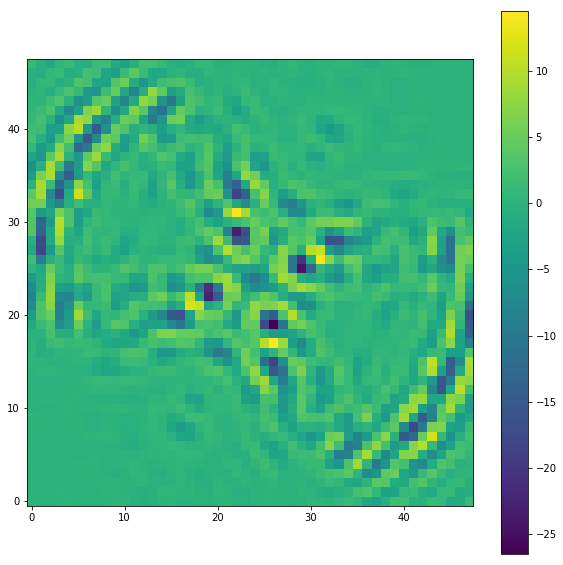

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(cube1[slicenum,trim:-trim,trim:-trim]-cube2[slicenum,trim:-trim,trim:-trim])
plt.colorbar()

#### Method 3: scipy's shift function

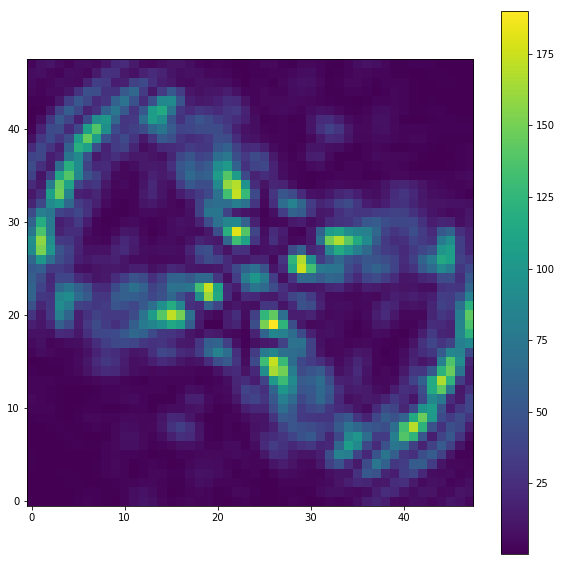

In [6]:
# cube.data[:] = np.array([scipy.ndimage.interpolation.spline_filter(cube.data[i]) for i in range(cube.data.shape[0])])
cube3 = scipy.ndimage.interpolation.shift(cube.data,[0,(-yshift*c+xshift*s),(-xshift*c-yshift*s)],order=3)
plt.figure(figsize=(10,10))
# plt.imshow(cube2[slicenum,trim:-trim,trim:-trim]-cube3[slicenum,trim:-trim,trim:-trim])
plt.imshow(cube3[slicenum,trim:-trim,trim:-trim])
plt.colorbar()
outkey = fits.HDUList(fits.PrimaryHDU(cube3.astype(np.float)))
outkey.writeto(par.exportDir+'/cube3_shift.fits',clobber=True)


#### DIfference between spline and scipy's shift

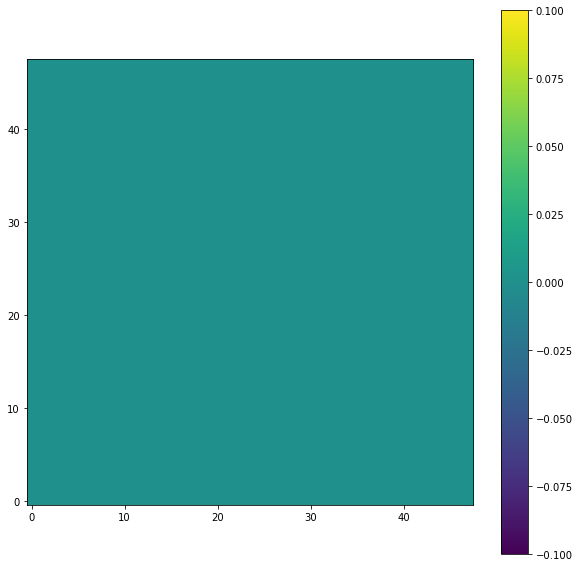

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(cube2[slicenum,trim:-trim,trim:-trim]-cube3[slicenum,trim:-trim,trim:-trim])
plt.colorbar()